In [1]:
# Importing the  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the  dataset
house_df = pd.read_csv('train.csv')

In [3]:
# Head
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(house_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house_df.shape

(1460, 81)

**We have 43 categorical variables and 38 numerical variables**

In [6]:
house_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
15%,219.850000,20.000000,50.000000,6120.000000,5.000000,5.000000,1936.000000,1955.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,115000.000000
35%,511.650000,20.000000,60.000000,8450.000000,5.000000,5.000000,1961.000000,1976.000000,0.000000,56.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,141000.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
55%,803.450000,60.000000,70.000000,9794.500000,6.000000,5.000000,1977.000000,1996.000000,0.000000,450.000000,...,63.450000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,172500.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000


**As we could see from the above data, there are some outliers in the dataset.**

### Visualizing the numerical datapoints

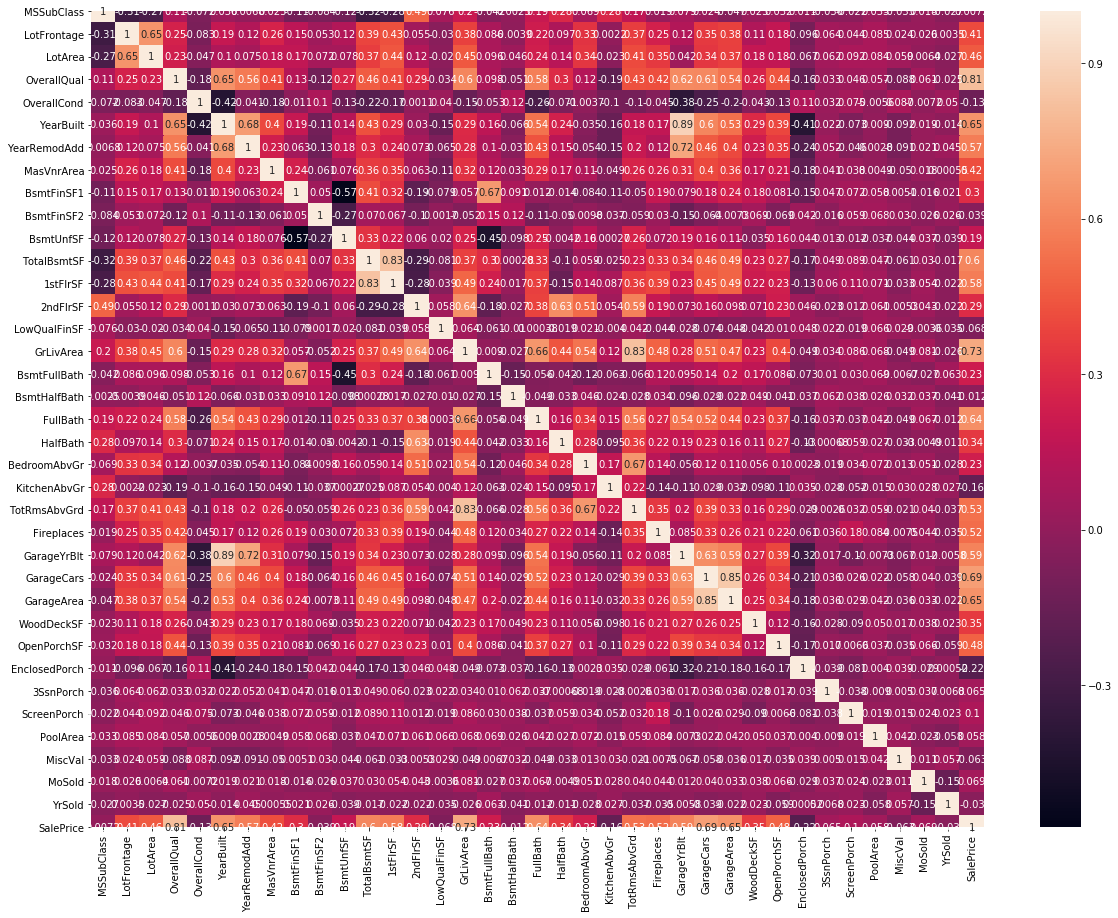

In [7]:
# Plotting heatmap to find the correlations

plt.figure(figsize=(20,15))  # setting figure size
sns.heatmap(house_df.drop(['Id'],1).corr(method='spearman'),annot=True)    # plotting heatmap
plt.show()

**From the above heatmap, We can conclude that some features like OverallQual,GrLivArea,GarageCars,GarageArea,Yearbuilt are having high positive correlations with target varaible i.e SalePrice.**

## Cleaning the dataset

Imputing nulll values with label 'NA' as per Data understanding/Business understanding - Null values depicts information as it shows some patterns hence can't impute any unknown variables or remove rows/columns.

In [8]:
# Checking the null value columns
house_df.columns[house_df.isnull().any()]   

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
# Imputing 'NA' value for categorical variables

values={'Alley':'NA', 'MasVnrType':'NA', 'BsmtQual':'NA','BsmtCond':'NA', 'BsmtExposure':'NA', 'BsmtFinType1':'NA', 
        'BsmtFinType2':'NA','Electrical':'NA', 'FireplaceQu':'NA', 'GarageType':'NA','GarageFinish':'NA',
        'GarageQual':'NA', 'GarageCond':'NA', 'PoolQC':'NA', 'Fence':'NA','MiscFeature':'NA'}
house_df=house_df.fillna(value=values)   # Filling categorical variables with 'NA' values
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [10]:
# Checking the null value columns now in the whole dataset

nan_cols=house_df.columns[house_df.isnull().any()]
(house_df[nan_cols].isnull().sum()/len(house_df))*100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

##### As we can see the percentage value is low for the missing values in the columns hence we will imput values with median value. We have outliers in the dataset hence median is the good choice.

In [11]:
# Filling the missing values with meadian value as it is the appropriate way to fill the missing values

int_cols={'LotFrontage':house_df['LotFrontage'].median(),'MasVnrArea':house_df['MasVnrArea'].median(),
          'GarageYrBlt':house_df['GarageYrBlt'].median()}


house_df=house_df.fillna(value=int_cols)   # Filling with median values

In [12]:
# Checking for missing values if any
house_df.columns[house_df.isnull().any()] 

Index([], dtype='object')

# Data Transformation

In [13]:
# Converting categorical variables into dummy variables

dummies=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
         'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
         'HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
         'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

# Creating dummies

dummies_df=pd.get_dummies(house_df[dummies],drop_first=True)   
dummies_df.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [14]:
 # Concatinating with original dataset
house_df=pd.concat([house_df,dummies_df],axis=1) 
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0


In [15]:
# Deleting repeated columns

house_df=house_df.drop(dummies,1)
house_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [16]:
# Creating binary variables

def central_air():
    return{'N':0,'Y':1}              # setting value for N=0 and Y=1
house_df['CentralAir']=house_df['CentralAir'].map(central_air())  # mapping with the return value and setting the value

In [17]:
house_df.info() # Checking the dataset for any category varibales left to convert into numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 263 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(36), uint8(224)
memory usage: 764.3 KB


**Now we can say that all the variables are converted into numericals**

## Visualization of the dataset with target variable

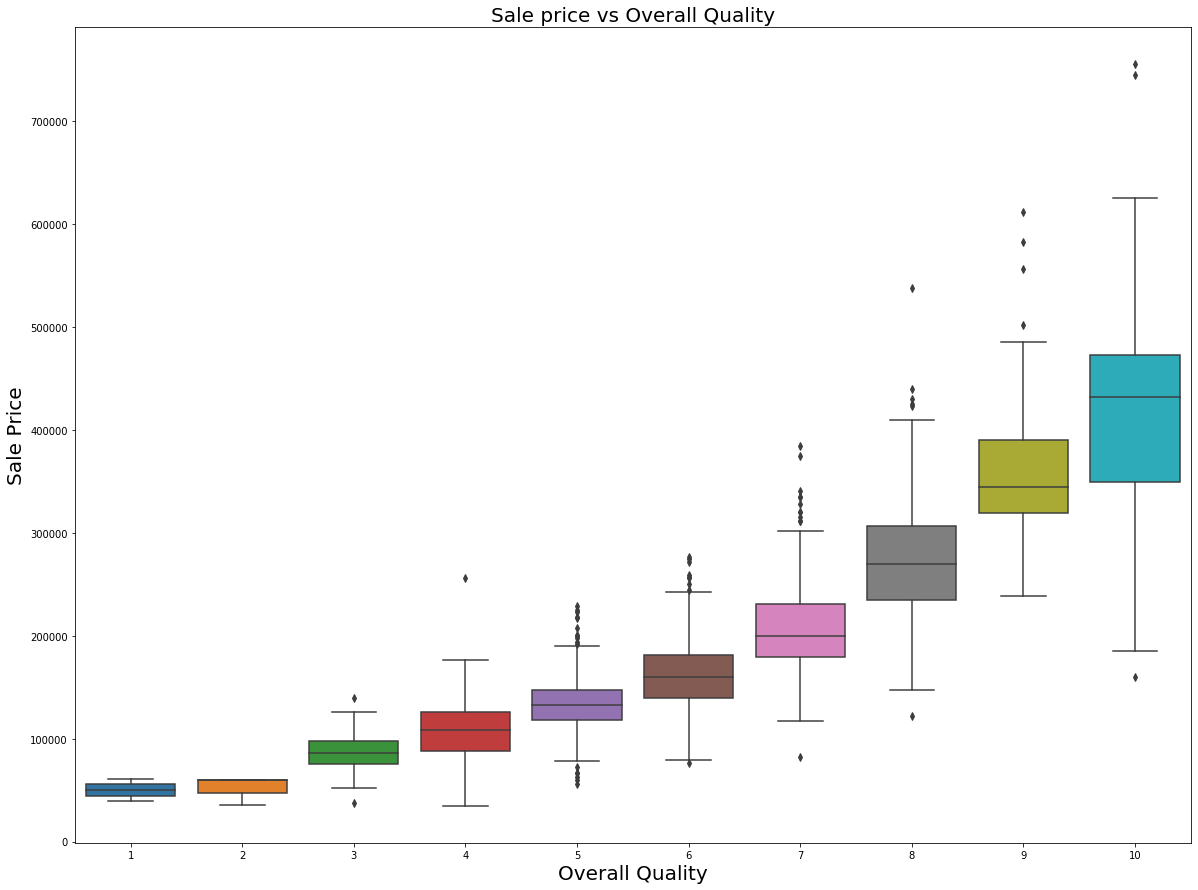

In [18]:
plt.figure(figsize=(20,15))                               # Setting the figure size
sns.boxplot(x='OverallQual',y='SalePrice',data=house_df)  # Creating boxplot to understand the distribution
plt.title('Sale price vs Overall Quality',fontsize=20)    # Setting the title
plt.xlabel('Overall Quality',fontsize=20)                 # Setting the x-label
plt.ylabel('Sale Price',fontsize=20)                      # Setting the x-label
plt.show()

Few points concluded from above boxplot -
- For Quality value 1, sale price is very less with other quality values
- For Quality value 10, sale price is the highest than the others
- For Quality value 10, we have some outliers as well
- Also we see that the sale price increase gradually with the progression of quality value.

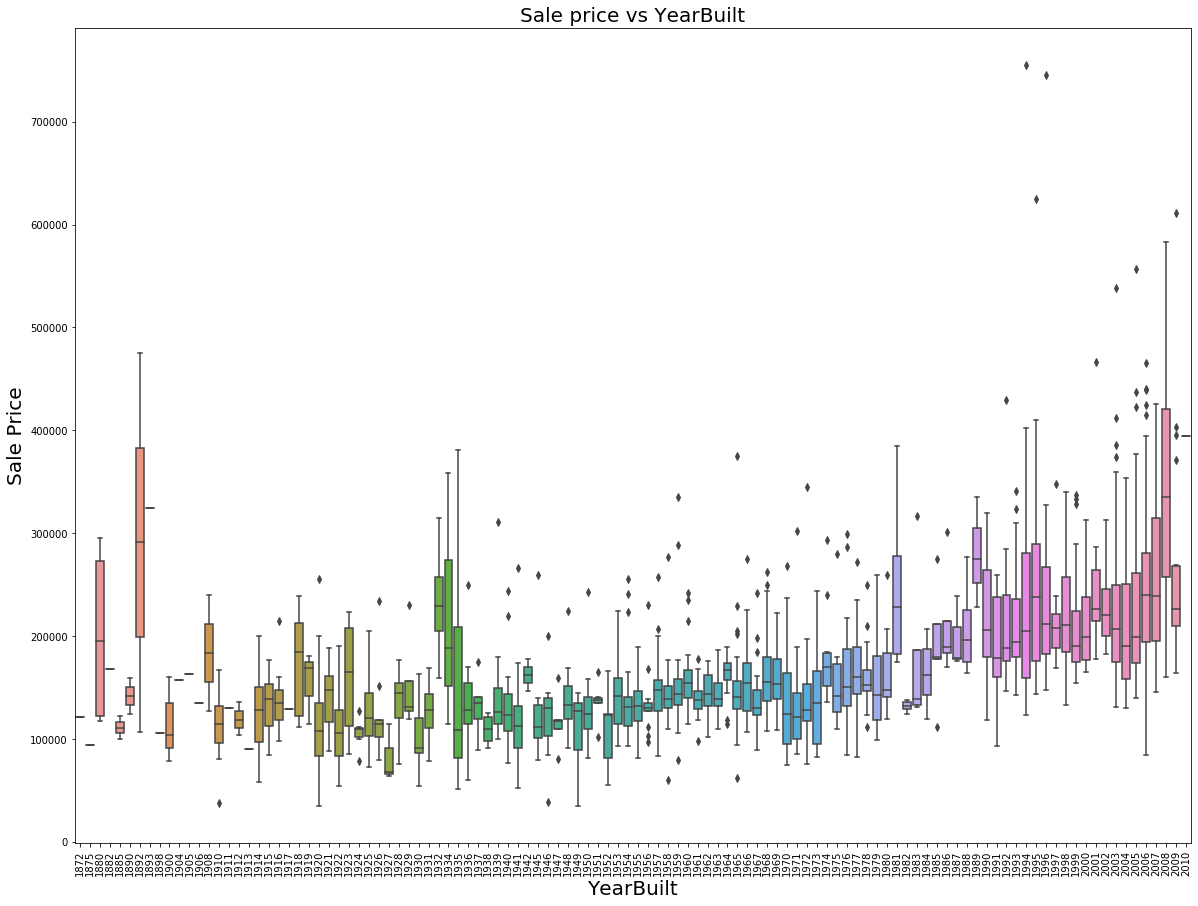

In [19]:
plt.figure(figsize=(20,15))                              # Setting the figure size
sns.boxplot(x='YearBuilt',y='SalePrice',data=house_df)   # Creating boxplot to understand the distribution
plt.title('Sale price vs YearBuilt',fontsize=20)         # Setting the title
plt.xlabel('YearBuilt',fontsize=20)                      # Setting the x-label
plt.ylabel('Sale Price',fontsize=20)                     # Setting the x-label
plt.xticks(rotation=90)                                  # Setting the rotaion on x - axis
plt.show()

Few points concluded from above boxplot -
- Year built of less value are having less sale price except for few exceptions
- Year built of high value are having high sale price especially from year 2000
- Mid years are having small boxplots than other years also contains outliers

## Data Preparation

In [20]:
from sklearn.preprocessing import StandardScaler         # imprting scaling library

scaler=StandardScaler()                                  # creating an object
X=house_df                                               # Creating new dataset from original dataset
X=X.drop(['Id'],1)                                       # dropping unnecessary variables and creating X value 
y=X.pop('SalePrice')                                     # Creating target variable dataset
cols_scale=X.select_dtypes(['float64','int64']).columns  # Find the columns needs scaling
X[cols_scale]=scaler.fit_transform(X[cols_scale])        # Now scaling

In [21]:
from sklearn.model_selection import train_test_split   # Importing necessary library

# Creating x, y train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)  

# Model Building and Evaluation
### Ridge Regression

In [22]:
# Importing necessary libraries

from sklearn.linear_model import Ridge   
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating an object

ridge=Ridge()                            

In [23]:
# Initiating Ridge Cross validation with some series of alpha values

parameters={'alpha':[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                    1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,200,400]}


folds=KFold(n_splits=5,shuffle=True,random_state=100)    # Defining folds

# Grid search Cross validation for Ridge regression

ridge_model_cv=GridSearchCV(estimator=ridge,param_grid=parameters,scoring='neg_mean_absolute_error',
                     cv=folds,return_train_score=True,verbose=1)
# Fitting the ridge model

ridge_model_cv.fit(X_train,y_train)

# Creating new dataframe for cv results

ridge_cv_results=pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.5s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023870,0.007395,0.003926,0.006055,0.001,{'alpha': 0.001},-22583.177571,-17574.372739,-18993.080340,-20209.372238,...,-20009.358324,1678.521154,28,-10923.318348,-11771.073230,-11203.691503,-11024.888224,-11341.497886,-11252.893838,296.441560
1,0.028497,0.002439,0.004450,0.004209,0.01,{'alpha': 0.01},-22520.892188,-17383.856064,-19358.541915,-20144.319902,...,-19610.052236,1718.625576,26,-10953.236745,-12064.938896,-11469.570927,-11045.234132,-11655.937521,-11437.783644,407.628770
2,0.021875,0.007655,0.000000,0.000000,0.1,{'alpha': 0.1},-21936.379948,-17068.618860,-19072.845619,-20080.598682,...,-19285.783609,1655.111462,16,-11167.075178,-12380.999671,-11840.385999,-11359.372164,-11982.173147,-11746.001232,436.473616
3,0.015621,0.000001,0.006251,0.007656,0.2,{'alpha': 0.2},-21481.902625,-17123.439668,-19074.611415,-20161.530316,...,-19280.112713,1474.240492,15,-11353.162071,-12702.697137,-12268.650648,-11705.538717,-12367.896490,-12079.589013,484.714135
4,0.015621,0.000002,0.015630,0.000002,0.3,{'alpha': 0.3},-21145.534683,-17251.914877,-19104.424120,-20246.515810,...,-19301.722889,1329.962387,17,-11500.085883,-12988.367558,-12647.099411,-11986.462199,-12689.224726,-12362.247955,541.224222


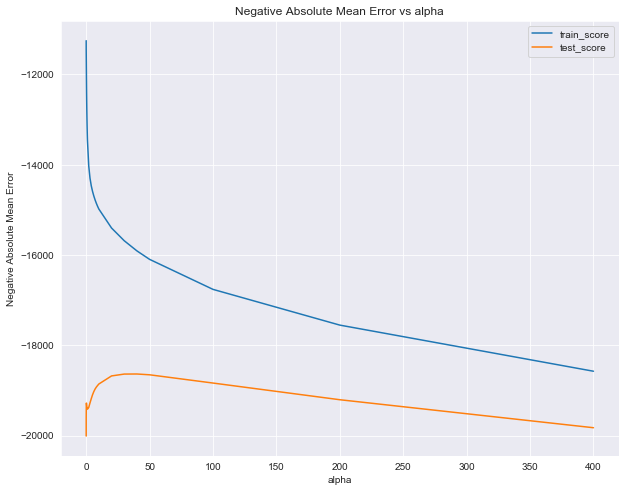

In [24]:
# Setting graph style

sns.set_style('darkgrid')

# Setting figure size

plt.figure(figsize=(10,8))

# Plotting the Ridge with cv rsults with train score and test score

plt.plot(ridge_cv_results['param_alpha'],ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'],ridge_cv_results['mean_test_score'])

# Setting x- label and y- label

plt.xlabel('alpha')
plt.ylabel('Negative Absolute Mean Error')

# Setting the title

plt.title('Negative Absolute Mean Error vs alpha')

# Setting the legend

plt.legend(['train_score','test_score'],loc='upper right')
plt.show()

**From the above graph, we can say that optimal alpha we found is 25, hence we will fit the train set with alpha value 25.**

In [25]:
alpha=25                   # setting the alpha value as 25

ridge=Ridge(alpha=alpha)   # Creating object with alpha 25 value
ridge.fit(X_train,y_train) # Fitting the ridge
ridge.coef_                # Getting the coefficients

array([-6.83835927e+03, -2.49150056e+03,  3.76855785e+03,  1.63768163e+04,
        5.47085959e+03,  5.51617935e+03,  2.32902967e+03,  4.68431500e+03,
        3.43137486e+02,  1.00218379e+03,  1.35410278e+03,  2.08912255e+03,
        8.97431787e+01,  5.85731725e+03,  1.27461654e+04, -1.13191286e+03,
        1.47929282e+04,  5.24005052e+03,  6.49478339e+02,  3.71773615e+03,
        1.02318597e+03, -1.72202580e+03, -3.17607005e+03,  2.52755356e+03,
        2.95643367e+03, -4.71194251e+01,  9.70876288e+03,  1.22753622e+02,
        2.12031067e+03, -6.60413090e+02,  6.51015372e+02,  1.32705154e+03,
        1.46083941e+03, -4.04221592e+02, -7.89662050e+01, -5.85246989e+02,
       -1.16612749e+03,  3.48056571e+03,  1.07406027e+03,  3.96010515e+03,
       -3.10639013e+03,  3.07835199e+03,  1.67883598e+03, -1.35383889e+03,
        1.36343731e+03, -6.94969756e+03,  3.97011688e+02,  6.13130802e+03,
        3.96369493e+03,  9.13584391e+03, -1.52419413e+03,  6.60745856e+03,
       -5.45657595e+03, -

In [26]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
#Predictor Variables from the Model built using Ridge Regression:

[('constant', 169058.573),
 ('MSSubClass', -6838.359),
 ('LotFrontage', -2491.501),
 ('LotArea', 3768.558),
 ('OverallQual', 16376.816),
 ('OverallCond', 5470.86),
 ('YearBuilt', 5516.179),
 ('YearRemodAdd', 2329.03),
 ('MasVnrArea', 4684.315),
 ('BsmtFinSF1', 343.137),
 ('BsmtFinSF2', 1002.184),
 ('BsmtUnfSF', 1354.103),
 ('TotalBsmtSF', 2089.123),
 ('CentralAir', 89.743),
 ('1stFlrSF', 5857.317),
 ('2ndFlrSF', 12746.165),
 ('LowQualFinSF', -1131.913),
 ('GrLivArea', 14792.928),
 ('BsmtFullBath', 5240.051),
 ('BsmtHalfBath', 649.478),
 ('FullBath', 3717.736),
 ('HalfBath', 1023.186),
 ('BedroomAbvGr', -1722.026),
 ('KitchenAbvGr', -3176.07),
 ('TotRmsAbvGrd', 2527.554),
 ('Fireplaces', 2956.434),
 ('GarageYrBlt', -47.119),
 ('GarageCars', 9708.763),
 ('GarageArea', 122.754),
 ('WoodDeckSF', 2120.311),
 ('OpenPorchSF', -660.413),
 ('EnclosedPorch', 651.015),
 ('3SsnPorch', 1327.052),
 ('ScreenPorch', 1460.839),
 ('PoolArea', -404.222),
 ('MiscVal', -78.966),
 ('MoSold', -585.247),
 ('Y

In [27]:
print(ridge.score(X_train,y_train))   # Printing the r2 value for train set
print(ridge.score(X_test,y_test))     # Printing the r2 value for test set

0.8831738135752334
0.8677390482247008


**Ridge regression model is having good r2 score for alpha 25 hence this is my final value.**

### Lasso Regression

In [28]:
# Importing the necessary library

from sklearn.linear_model import Lasso

lasso=Lasso()   # Creating an object

# Grid search Cross validation for Lasso regression

lasso_model_cv=GridSearchCV(estimator=lasso,param_grid=parameters,scoring='neg_mean_absolute_error',cv=folds,
                           return_train_score=True,verbose=1)
# Fitting the lasso model

lasso_model_cv.fit(X_train,y_train)

# Creating new dataframe for lass cv results
lasso_cv_results=pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  1.2min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.473214,0.012597,0.000000,0.000000,0.001,{'alpha': 0.001},-22603.900754,-17470.932732,-19177.004917,-19606.912601,...,-19745.771142,1656.824072,28,-10935.257604,-11975.817955,-11378.242621,-11033.999824,-11496.635893,-11363.990779,370.090935
1,0.559373,0.082325,0.003125,0.006250,0.01,{'alpha': 0.01},-22600.342858,-17466.780335,-19160.270114,-19592.497666,...,-19733.242007,1657.820863,27,-10935.637609,-11976.007710,-11378.650883,-11034.108125,-11496.865938,-11364.254053,370.065969
2,0.449993,0.030362,0.000000,0.000000,0.1,{'alpha': 0.1},-22552.099942,-17434.838757,-19023.746919,-19485.196097,...,-19630.741454,1659.785734,26,-10939.813947,-11979.405348,-11383.872853,-11035.905137,-11500.756857,-11367.950828,370.222396
3,0.429718,0.028791,0.006234,0.007636,0.2,{'alpha': 0.2},-22501.946494,-17416.475453,-18964.774078,-19463.760015,...,-19592.153535,1651.590010,25,-10945.345767,-11983.214822,-11390.254752,-11038.693909,-11505.350061,-11372.571862,370.087607
4,0.431235,0.037765,0.000000,0.000000,0.3,{'alpha': 0.3},-22453.428314,-17398.642005,-18940.476289,-19435.662597,...,-19559.759468,1641.372007,24,-10950.663076,-11987.028564,-11396.688211,-11042.665510,-11509.933804,-11377.395833,369.793405


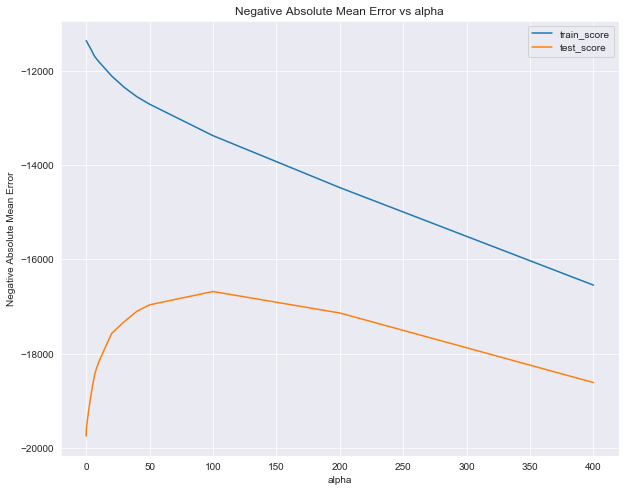

In [29]:
# Setting graph style

sns.set_style('darkgrid')

# Setting figure size

plt.figure(figsize=(10,8))

# Plotting the Ridge with cv rsults with train score and test score

plt.plot(lasso_cv_results['param_alpha'],lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'],lasso_cv_results['mean_test_score'])

# Setting x- label and y- label

plt.xlabel('alpha')
plt.ylabel('Negative Absolute Mean Error')

# Setting the title

plt.title('Negative Absolute Mean Error vs alpha')

# Setting the legend

plt.legend(['train_score','test_score'],loc='upper right')
plt.show()

**From the above graph, we can say that optimal alpha we found is 100, hence we will fit the train set with alpha value 100.**

In [30]:
alpha=100                                # setting the alpha value as 100
lasso1=Lasso(alpha=alpha,max_iter=10e5)  # Creating object with alpha 100 value
lasso1.fit(X_train,y_train)              # Fitting the Lasso
lasso1.coef_

array([-5.42801388e+03,  5.36203895e+02,  3.74547088e+03,  1.20573868e+04,
        6.69595914e+03,  8.95533652e+03,  2.38554029e+03,  3.96481801e+03,
        4.19399090e+03,  1.54717468e+02, -0.00000000e+00,  9.15439520e+03,
       -0.00000000e+00,  0.00000000e+00,  5.79191322e+03, -2.82587659e+03,
        2.79060615e+04,  3.11559333e+03,  0.00000000e+00,  1.76901300e+03,
       -3.59556862e+02, -2.76233138e+03, -3.77554506e+03,  3.57402507e+01,
        1.64076305e+03,  1.37776060e+03,  5.07091991e+03,  7.14371087e+02,
        1.29650457e+03,  4.88228265e+02, -0.00000000e+00,  7.05278762e+02,
        8.29640302e+02,  2.63408846e+03, -6.55328891e+01, -5.85293478e+02,
       -4.44443352e+02,  0.00000000e+00,  0.00000000e+00,  4.78806915e+03,
       -6.00467115e+02,  0.00000000e+00,  6.38778238e+02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  5.96886032e+02,  1.13682447e+03,
        0.00000000e+00,  3.85294367e+03, -0.00000000e+00,  8.13402621e+03,
       -2.96764316e+03, -

##### As we can see that there are many coefficients with value 0. This is the benefit for using las regression, we can get dimentionality reduction also.

In [31]:
print(lasso1.score(X_train,y_train))   # Printing the r2 value for train set
print(lasso1.score(X_test,y_test))     # Printing the r2 value for test set
print(np.sum(lasso1.coef_!=0))         # Number of coefficients equal to 0

0.9326928924015238
0.6833790869306056
112


#### As we can see from the above r2 score from train and test set, there is big difference between them, hence over alpha value is not optimal. It shows that the model is facing overfitting. We have to increase the alpha value to get rid of overfitting.

In [32]:
# Creating new dataset with lasso coefficients

lasso_house=pd.DataFrame(lasso1.coef_)  
lasso_house=lasso_house.T       

# Creating columns for X dataset

new_cols=X.columns
lasso_house.columns=new_cols

# Sorting the dataset
lasso_house=lasso_house.sort_values(by=0,axis=1,ascending=False)
lasso_house.head()

,RoofMatl_WdShngl,Neighborhood_NoRidge,GrLivArea,Neighborhood_Crawfor,Neighborhood_NridgHt,BsmtExposure_Gd,Neighborhood_Somerst,Exterior1st_BrkFace,Neighborhood_StoneBr,OverallQual,...,Neighborhood_Mitchel,ExterQual_TA,Neighborhood_Edwards,KitchenQual_Fa,BsmtQual_TA,KitchenQual_TA,BsmtQual_Gd,KitchenQual_Gd,Condition2_PosN,PoolQC_Gd
0,44127.162566,33204.751508,27906.061523,20540.196674,18276.91574,17794.325693,16272.109667,15915.640107,15046.166152,12057.386773,...,-8689.332749,-8962.204089,-9575.127906,-14584.19849,-16594.74842,-21425.506377,-23936.941429,-23937.483203,-284644.561135,-494777.584194


In [33]:
# Finding the column names with zero coefficient values

list1=[]
for i in range(lasso_house.shape[1]):
    if lasso_house.iloc[0,i]==0:
        list1.append(lasso_house.columns.values[i])
print(len(list1))                    # Total count for the zero coef

149


## Creating VIF to check the multicollinearity

In [34]:
# Creating vif dataframe

vif=pd.DataFrame()

# Adding same features as the x_train dataset have with removing some undesired features from train set

vif['Features']=X_train.drop(list1,axis=1).columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train.drop(list1,axis=1).values,i) for i in range(X_train.drop(list1,axis=1).shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset

,Features,VIF
111,SaleCondition_Partial,inf
109,SaleType_New,inf
105,GarageCond_NA,inf
104,GarageQual_NA,inf
100,GarageType_NA,inf
93,BsmtFinType2_Unf,34.16
77,ExterQual_TA,31.67
32,MSZoning_RL,29.06
34,Alley_NA,23.59
37,LandContour_Lvl,20.88


**As we can see there are some variables with VIF value as infiniity, hence we need to remove these variables and create again a new model.**

In [35]:
X1=X_train.drop(list1,axis=1)              # Dropping the zero coefs features 
X1=X1.drop('SaleCondition_Partial',axis=1) # Dropping the feature with high VIF value


In [36]:
# lasso regression Grid Search Cross validation 

lasso_model_cv1=GridSearchCV(estimator=lasso,param_grid=parameters,scoring='neg_mean_absolute_error',cv=folds,
                           return_train_score=True,verbose=1)
lasso_model_cv1.fit(X1,y_train)   # Fitting the lasso model

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    9.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                   20, 30, 40, 50, 100, 200, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

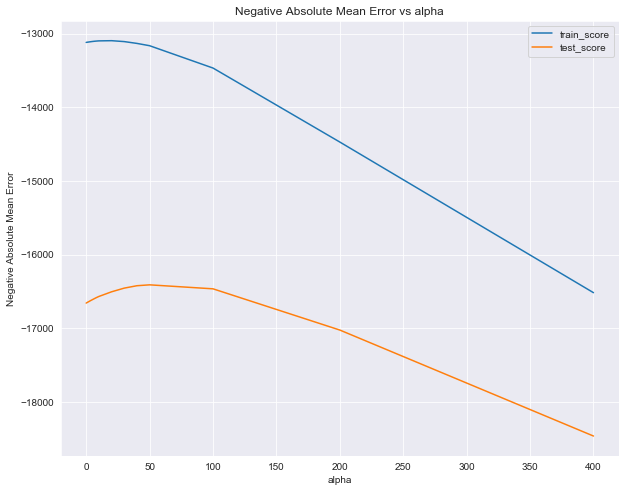

In [37]:
lasso_cv_results1=pd.DataFrame(lasso_model_cv1.cv_results_)    # Creating New dataframe with lasso coeffs
sns.set_style('darkgrid')                                      # Setting graph style
plt.figure(figsize=(10,8))                                     # Setting figure size
plt.plot(lasso_cv_results1['param_alpha'],lasso_cv_results1['mean_train_score'])   # Plotting lasso cv results with mean train score
plt.plot(lasso_cv_results1['param_alpha'],lasso_cv_results1['mean_test_score'])    # Plotting lasso cv results with mean test score
plt.xlabel('alpha')                                     # Setting the x- label
plt.ylabel('Negative Absolute Mean Error')              # Setting the y- label
plt.title('Negative Absolute Mean Error vs alpha')      # Setting the title
plt.legend(['train_score','test_score'],loc='upper right') # Setting the legend
plt.show()

**From the above graph, we can say that optimal alpha we found is 50, hence we will fit the train set with alpha value 50.**

In [38]:
alpha=50                                # setting the alpha value as 50
lasso2=Lasso(alpha=alpha,max_iter=10e5)  # Creating object with alpha 100 value
lasso2.fit(X1,y_train)              # Fitting the Lasso

# Getting the r2 score for train and test set and number of zero's coefs
print(lasso2.score(X1,y_train))
print(lasso2.score(X_test[X1.columns],y_test))
print(np.sum(lasso2.coef_!=0))     # Summing the coefs for value equals to zero

0.9395020511936594
0.601124313831024
109


**As we can see from the above r2 score from train and test set, there is big difference between them, hence over alpha value is not optimal. It shows that the model is facing overfitting. We have to increase the alpha value to get rid of overfitting.**

In [39]:
# Creating new dataset with lasso coefficients

lasso_house1=pd.DataFrame(lasso2.coef_)   
lasso_house1=lasso_house1.T

# Creating columns for X dataset

new_cols=X1.columns
lasso_house1.columns=new_cols

# Sorting the dataset

lasso_house1=lasso_house1.sort_values(by=0,axis=1,ascending=False)
lasso_house1.head()

,RoofMatl_WdShngl,Neighborhood_NoRidge,GrLivArea,Neighborhood_Crawfor,Neighborhood_StoneBr,Exterior1st_BrkFace,BsmtExposure_Gd,Neighborhood_Somerst,Neighborhood_NridgHt,SaleType_New,...,ExterQual_Gd,Neighborhood_Mitchel,ExterQual_TA,BsmtQual_TA,KitchenQual_Fa,KitchenQual_TA,BsmtQual_Gd,KitchenQual_Gd,Condition2_PosN,PoolQC_Gd
0,54262.689033,31612.109651,28894.578203,21423.108177,19427.244468,17660.296067,17494.160799,16526.960158,15850.063201,14600.119112,...,-9723.859433,-11510.183381,-12791.264244,-18060.369866,-19694.395198,-23188.26342,-24722.656135,-25583.122869,-357725.675919,-600236.62918


In [40]:
# Finding the column names with zero coefficient values

list2=[]
for i in range(lasso_house1.shape[1]):
    if lasso_house1.iloc[0,i]==0:
        list2.append(lasso_house1.columns.values[i])  # Total count for the zero coef
print(list2)

['GarageCond_NA', 'BsmtFinType1_Unf']


#### Creating VIF to check the multicollinearity

In [41]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have with removing some undesired features from train set

vif['Features']=X1.drop(list2,axis=1).columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X1.drop(list2,axis=1).values,i) for i in range(X1.drop(list2,axis=1).shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset

,Features,VIF
103,GarageQual_NA,inf
99,GarageType_NA,inf
92,BsmtFinType2_Unf,32.78
77,ExterQual_TA,31.54
32,MSZoning_RL,29.06
34,Alley_NA,23.57
37,LandContour_Lvl,20.86
98,Functional_Typ,19.64
97,KitchenQual_TA,19.23
13,GrLivArea,15.48


As we can see from the above VIF table, still there are features with very high VIF values. These need to be removed and repeat our process as we need to drop one by one VIF fetaure having high VIF value.

#### Creating VIF to check the multicollinearity

In [42]:
# Creating new dataset and dropping the highest VIF value

X2=X1                     
X2=X2.drop('GarageQual_NA',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X2.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset

,Features,VIF
104,GarageCond_NA,inf
100,GarageType_NA,inf
93,BsmtFinType2_Unf,34.16
77,ExterQual_TA,31.67
32,MSZoning_RL,29.06
34,Alley_NA,23.59
37,LandContour_Lvl,20.88
99,Functional_Typ,19.69
98,KitchenQual_TA,19.26
13,GrLivArea,15.52


In [43]:
# Creating new dataset and dropping the highest VIF value

X3=X2                     
X3=X3.drop('GarageCond_NA',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X3.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset

,Features,VIF
93,BsmtFinType2_Unf,34.16
77,ExterQual_TA,31.67
32,MSZoning_RL,29.06
34,Alley_NA,23.59
37,LandContour_Lvl,20.88
99,Functional_Typ,19.69
98,KitchenQual_TA,19.26
13,GrLivArea,15.52
76,ExterQual_Gd,15.17
11,2ndFlrSF,15.12


From the above VIF table, still there are high VIF value, so need to remove those feature

In [44]:
# Creating new dataset and dropping the highest VIF value

X4=X3
X4=X4.drop('BsmtFinType2_Unf',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X4.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X4.values,i) for i in range(X4.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
77,ExterQual_TA,31.55
32,MSZoning_RL,28.87
34,Alley_NA,23.58
37,LandContour_Lvl,20.82
98,Functional_Typ,19.58
97,KitchenQual_TA,19.24
13,GrLivArea,15.48
76,ExterQual_Gd,15.09
11,2ndFlrSF,14.99
105,Fence_NA,13.44


From the above VIF table, still there are high VIF value, so need to remove those features.

In [45]:
# Creating new dataset and dropping the highest VIF value

X5=X4
X5=X5.drop('ExterQual_TA',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X5.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X5.values,i) for i in range(X5.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
32,MSZoning_RL,27.66
34,Alley_NA,23.58
37,LandContour_Lvl,20.74
97,Functional_Typ,19.30
96,KitchenQual_TA,17.60
13,GrLivArea,15.21
11,2ndFlrSF,14.80
104,Fence_NA,13.42
82,BsmtCond_TA,13.19
81,BsmtQual_TA,12.85


From the above VIF table, still there are high VIF value, so need to remove those features.

In [46]:
# Creating new dataset and dropping the highest VIF value

X6=X5
X6=X6.drop('MSZoning_RL',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X6.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X6.values,i) for i in range(X6.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
33,Alley_NA,22.68
36,LandContour_Lvl,20.32
96,Functional_Typ,19.13
95,KitchenQual_TA,17.48
13,GrLivArea,15.15
11,2ndFlrSF,14.65
103,Fence_NA,13.28
81,BsmtCond_TA,13.14
80,BsmtQual_TA,12.75
94,KitchenQual_Gd,11.78


From the above VIF table, still there are high VIF value, so need to remove those features.

In [47]:
# Creating new dataset and dropping the highest VIF value

X7=X6
X7=X7.drop('Alley_NA',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X7.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X7.values,i) for i in range(X7.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
35,LandContour_Lvl,19.68
95,Functional_Typ,19.05
94,KitchenQual_TA,17.12
13,GrLivArea,15.11
11,2ndFlrSF,14.65
102,Fence_NA,13.03
80,BsmtCond_TA,12.82
79,BsmtQual_TA,12.67
93,KitchenQual_Gd,11.58
73,MasVnrType_None,10.97


From the above VIF table, still there are high VIF value, so need to remove those features.

In [48]:
# Creating new dataset and dropping the highest VIF value

X8=X7
X8=X8.drop('LandContour_Lvl',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X8.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X8.values,i) for i in range(X8.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
94,Functional_Typ,18.80
93,KitchenQual_TA,16.71
13,GrLivArea,15.09
11,2ndFlrSF,14.58
101,Fence_NA,12.96
79,BsmtCond_TA,12.78
78,BsmtQual_TA,12.64
92,KitchenQual_Gd,11.43
72,MasVnrType_None,10.80
103,SaleCondition_Normal,10.33


From the above VIF table, still there are high VIF value, so need to remove those features

In [49]:
# Creating new dataset and dropping the highest VIF value

X9=X8
X9=X9.drop('Functional_Typ',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X9.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X9.values,i) for i in range(X9.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
93,KitchenQual_TA,16.38
13,GrLivArea,14.81
11,2ndFlrSF,14.43
100,Fence_NA,12.70
79,BsmtCond_TA,12.67
78,BsmtQual_TA,12.56
92,KitchenQual_Gd,11.24
72,MasVnrType_None,10.34
102,SaleCondition_Normal,10.30
59,HouseStyle_1Story,9.98


From the above VIF table, still there are high VIF value, so need to remove those features

In [50]:
# Creating new dataset and dropping the highest VIF value

X10=X9
X10=X10.drop('KitchenQual_TA',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X10.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X10.values,i) for i in range(X10.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
13,GrLivArea,14.80
11,2ndFlrSF,14.42
79,BsmtCond_TA,12.56
99,Fence_NA,12.28
78,BsmtQual_TA,11.88
72,MasVnrType_None,10.12
101,SaleCondition_Normal,10.11
59,HouseStyle_1Story,9.88
52,Condition1_Norm,9.17
5,YearBuilt,8.65


From the above VIF table, still there are high VIF value, so need to remove those features.

In [51]:
# Creating new dataset and dropping the highest VIF value

X11=X10
X11=X11.drop('GrLivArea',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X11.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X11.values,i) for i in range(X11.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
78,BsmtCond_TA,12.50
98,Fence_NA,12.17
77,BsmtQual_TA,11.58
100,SaleCondition_Normal,10.11
71,MasVnrType_None,10.08
58,HouseStyle_1Story,9.63
11,2ndFlrSF,9.62
51,Condition1_Norm,9.17
5,YearBuilt,8.48
76,BsmtQual_Gd,7.96


From the above VIF table, still there are high VIF value, so need to remove those features.

In [52]:
# Creating new dataset and dropping the highest VIF value

X12=X11
X12=X12.drop('BsmtCond_TA',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X12.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X12.values,i) for i in range(X12.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
97,Fence_NA,12.12
77,BsmtQual_TA,10.75
99,SaleCondition_Normal,10.03
71,MasVnrType_None,10.00
58,HouseStyle_1Story,9.63
11,2ndFlrSF,9.60
51,Condition1_Norm,9.11
5,YearBuilt,8.30
76,BsmtQual_Gd,7.55
21,GarageCars,7.47


From the above VIF table, still there are high VIF value, so need to remove those features.

In [53]:
# Creating new dataset and dropping the highest VIF value

X13=X12
X13=X13.drop('Fence_NA',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X13.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X13.values,i) for i in range(X13.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
77,BsmtQual_TA,10.70
98,SaleCondition_Normal,9.70
71,MasVnrType_None,9.70
11,2ndFlrSF,9.59
58,HouseStyle_1Story,9.46
51,Condition1_Norm,8.98
5,YearBuilt,8.30
21,GarageCars,7.47
76,BsmtQual_Gd,7.47
22,GarageArea,7.15


From the above VIF table, still there are high VIF value, so need to remove those features.

In [54]:
# Creating new dataset and dropping the highest VIF value

X14=X13
X14=X14.drop('BsmtQual_TA',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X14.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X14.values,i) for i in range(X14.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
11,2ndFlrSF,9.58
97,SaleCondition_Normal,9.57
71,MasVnrType_None,9.52
58,HouseStyle_1Story,9.45
51,Condition1_Norm,8.83
5,YearBuilt,8.12
21,GarageCars,7.46
22,GarageArea,7.15
79,BsmtExposure_No,6.03
74,Foundation_PConc,5.92


In [55]:
# Creating new dataset and dropping the highest VIF value

X15=X14
X15=X15.drop('2ndFlrSF',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X15.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X15.values,i) for i in range(X15.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
96,SaleCondition_Normal,9.57
70,MasVnrType_None,9.45
50,Condition1_Norm,8.77
5,YearBuilt,8.00
20,GarageCars,7.46
57,HouseStyle_1Story,7.42
21,GarageArea,7.14
73,Foundation_PConc,5.92
78,BsmtExposure_No,5.86
91,GarageFinish_Unf,5.34


In [56]:
# Creating new dataset and dropping the highest VIF value

X16=X15
X16=X16.drop('SaleCondition_Normal',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X16.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X16.values,i) for i in range(X16.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
70,MasVnrType_None,8.90
50,Condition1_Norm,8.59
5,YearBuilt,8.00
20,GarageCars,7.45
57,HouseStyle_1Story,7.36
21,GarageArea,7.13
73,Foundation_PConc,5.91
78,BsmtExposure_No,5.85
91,GarageFinish_Unf,5.26
8,BsmtFinSF1,4.96


In [57]:
# Creating new dataset and dropping the highest VIF value

X17=X16
X17=X17.drop('MasVnrType_None',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X17.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X17.values,i) for i in range(X17.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
50,Condition1_Norm,8.03
5,YearBuilt,7.96
20,GarageCars,7.42
57,HouseStyle_1Story,7.28
21,GarageArea,7.12
72,Foundation_PConc,5.81
77,BsmtExposure_No,5.74
90,GarageFinish_Unf,5.01
8,BsmtFinSF1,4.95
19,GarageYrBlt,4.68


In [58]:
# Creating new dataset and dropping the highest VIF value

X18=X17
X18=X18.drop('Condition1_Norm',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X18.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X18.values,i) for i in range(X18.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
5,YearBuilt,7.95
20,GarageCars,7.42
21,GarageArea,7.11
56,HouseStyle_1Story,6.97
71,Foundation_PConc,5.75
76,BsmtExposure_No,5.74
8,BsmtFinSF1,4.94
89,GarageFinish_Unf,4.85
19,GarageYrBlt,4.68
80,BsmtFinType1_Unf,4.50


In [59]:
# Creating new dataset and dropping the highest VIF value

X19=X18
X19=X19.drop('YearBuilt',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X19.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X19.values,i) for i in range(X19.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
19,GarageCars,7.42
20,GarageArea,7.03
55,HouseStyle_1Story,6.84
70,Foundation_PConc,5.70
75,BsmtExposure_No,5.64
7,BsmtFinSF1,4.94
88,GarageFinish_Unf,4.77
79,BsmtFinType1_Unf,4.49
16,TotRmsAbvGrd,4.40
56,HouseStyle_2Story,4.35


In [60]:
# Creating new dataset and dropping the highest VIF value

X20=X19
X20=X20.drop('GarageCars',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X20.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X20.values,i) for i in range(X20.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
54,HouseStyle_1Story,6.79
69,Foundation_PConc,5.70
74,BsmtExposure_No,5.63
7,BsmtFinSF1,4.93
87,GarageFinish_Unf,4.75
78,BsmtFinType1_Unf,4.48
16,TotRmsAbvGrd,4.40
55,HouseStyle_2Story,4.32
18,GarageYrBlt,4.25
0,MSSubClass,4.23


In [61]:
# Creating new dataset and dropping the highest VIF value

X21=X20
X21=X21.drop('HouseStyle_1Story',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X21.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X21.values,i) for i in range(X21.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
68,Foundation_PConc,5.60
73,BsmtExposure_No,5.44
7,BsmtFinSF1,4.92
86,GarageFinish_Unf,4.71
77,BsmtFinType1_Unf,4.46
16,TotRmsAbvGrd,4.24
18,GarageYrBlt,4.22
54,HouseStyle_2Story,4.12
66,ExterQual_Gd,4.05
3,OverallQual,3.98


In [62]:
# Creating new dataset and dropping the highest VIF value

X22=X21
X22=X22.drop('Foundation_PConc',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X22.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X22.values,i) for i in range(X22.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
72,BsmtExposure_No,5.35
7,BsmtFinSF1,4.92
85,GarageFinish_Unf,4.71
76,BsmtFinType1_Unf,4.36
16,TotRmsAbvGrd,4.24
18,GarageYrBlt,4.16
54,HouseStyle_2Story,4.06
66,ExterQual_Gd,4.03
3,OverallQual,3.96
29,LotShape_Reg,3.75


In [63]:
# Creating new dataset and dropping the highest VIF value

X23=X22
X23=X23.drop('BsmtExposure_No',axis=1)

# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X23.columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X23.values,i) for i in range(X23.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif.head(10)   # Viewing the dataset


,Features,VIF
7,BsmtFinSF1,4.91
84,GarageFinish_Unf,4.59
16,TotRmsAbvGrd,4.23
75,BsmtFinType1_Unf,4.16
18,GarageYrBlt,4.16
66,ExterQual_Gd,4.02
54,HouseStyle_2Story,3.94
3,OverallQual,3.94
29,LotShape_Reg,3.73
73,BsmtFinType1_GLQ,3.69


##### We now come to the point where we have VIF value less than 5, which means we removed the multicollinearlity issue. Now we have our dataset with no multicollinearity wwe can proceed to create our final model with lasso regression. We choose lasso regression because lasso is more convenient and useful than ridge regression as it does dimenionality regression.

In [65]:
# lasso regression Grid Search cross validation 

lasso_model_cv23=GridSearchCV(estimator=lasso,param_grid=parameters,scoring='neg_mean_absolute_error',cv=folds,
                           return_train_score=True,verbose=1)

# Fitting the lasso final model

lasso_model_cv23.fit(X23,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                   20, 30, 40, 50, 100, 200, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

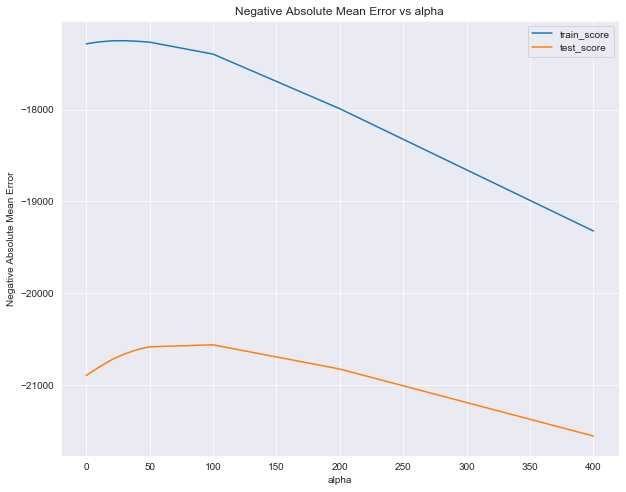

In [66]:
lasso_cv_results23=pd.DataFrame(lasso_model_cv23.cv_results_)                       # Creating New dataframe with lasso coeffs
sns.set_style('darkgrid')                                                           # Setting graph style
plt.figure(figsize=(10,8))                                                          # Setting figure size

# Plotting lasso cv results with mean train score

plt.plot(lasso_cv_results23['param_alpha'],lasso_cv_results23['mean_train_score'])

# Plotting lasso cv results with mean test score

plt.plot(lasso_cv_results23['param_alpha'],lasso_cv_results23['mean_test_score'])

plt.xlabel('alpha')                                     # Setting the x- label
plt.ylabel('Negative Absolute Mean Error')              # Setting the y- label
plt.title('Negative Absolute Mean Error vs alpha')      # Setting the title
plt.legend(['train_score','test_score'],loc='upper right') # Setting the legend
plt.show()

#### From the above graph, we can say that optimal alpha we found is 100, hence we will fit the train set with alpha value 100.

In [67]:
alpha=100                                 # setting the alpha value as 100
lasso23=Lasso(alpha=alpha,max_iter=10e5)  # Creating object with alpha 100 value
lasso23.fit(X23,y_train)                   # Fitting the Lasso

# Getting the r2 score for train and test set and number of zero's coefs

print(lasso23.score(X23,y_train))
print(lasso23.score(X_test[X23.columns],y_test))

0.89870224074389
0.7246092109715294


##### As we can see that the r2 score from train and test set is still not in the acceptable range, hence to do that we need to increase the alpha. We change the alpha value to 250 now and we will fit again the train set for final lasso model

In [68]:
alpha=250                                 # setting the alpha value as 100
lasso23=Lasso(alpha=alpha,max_iter=10e5)  # Creating object with alpha 100 value
lasso23.fit(X23,y_train)                   # Fitting the Lasso

# Getting the r2 score for train and test set and number of zero's coefs

print(lasso23.score(X23,y_train))
print(lasso23.score(X_test[X23.columns],y_test))

0.8619931185019923
0.8283655503659346


From the above scores of train set and test set, they are not having big differences hence we accept the alpha value as 250.

##### As the alpha value is in acceptable range, we found the optimal value for alpha i.e it is 250 to predict the test set.

In [69]:
# Creating new dataset with lasso coefficients

lasso_house23=pd.DataFrame(lasso23.coef_)  
lasso_house23=lasso_house23.T       

# Creating columns for X dataset

new_cols=X23.columns
lasso_house23.columns=new_cols

# Sorting the dataset
lasso_house23=lasso_house23.sort_values(by=0,axis=1,ascending=False)
lasso_house23.head()

,Neighborhood_NoRidge,RoofMatl_WdShngl,Neighborhood_NridgHt,OverallQual,BsmtExposure_Gd,Neighborhood_Crawfor,Exterior1st_BrkFace,TotRmsAbvGrd,Neighborhood_StoneBr,SaleType_New,...,Neighborhood_NWAmes,Neighborhood_NAmes,BsmtFinType1_Unf,MSZoning_RM,GarageFinish_Unf,GarageFinish_RFn,Neighborhood_Edwards,Condition2_PosN,BsmtQual_Gd,PoolQC_Gd
0,53555.183677,27973.845593,26822.829432,22708.743896,21481.543879,18821.634209,11898.722831,11845.445897,10617.067806,9567.874937,...,-4623.428287,-4801.328077,-6023.135764,-6041.384683,-6606.902882,-6997.460012,-7654.466671,-9533.709895,-12822.544244,-164229.707759


In [72]:
# Finding the column names with zero coefficient values

list23=[]
for i in range(lasso_house23.shape[1]):
    if lasso_house23.iloc[0,i]==0:
        list23.append(lasso_house23.columns.values[i])    # Total count for the zero coef
print(list23)

['BsmtFinType2_LwQ', 'HouseStyle_1.5Unf', 'HouseStyle_2Story', 'Exterior2nd_ImStucc', 'RoofStyle_Hip', 'BsmtFinType2_BLQ', 'Exterior1st_Plywood', 'Condition1_RRAe', 'Exterior2nd_Plywood', 'BsmtFinType1_BLQ', 'BsmtQual_Fa', 'Condition1_RRAn', 'BldgType_2fmCon', 'Neighborhood_Veenker', 'Neighborhood_Mitchel', 'OpenPorchSF', 'Fence_MnPrv', 'LotShape_Reg', 'LandContour_HLS', 'Neighborhood_Timber', 'GarageQual_Fa', 'Neighborhood_BrkSide', 'GarageType_NA', 'KitchenQual_Fa', 'BsmtFinSF2']


### Prediction

In [73]:
from sklearn.metrics import r2_score    # Importing the necessary library

y_train_pred = lasso23.predict(X23)     # Predicting the Train set
print(r2_score(y_true=y_train, y_pred=y_train_pred))  # printing the r2 score value for train set
y_test_pred = lasso23.predict(X_test[X23.columns])    # Predicting the Test set
print(r2_score(y_true=y_test, y_pred=y_test_pred))    # printing the r2 score value for train set

0.8619931185019925
0.8283655503659346


In [74]:
# Creating new dataframe for actual sales and predicted sales prices.

final_pred_sale_price=pd.DataFrame({'Sale_price':y_test.values,'Sale_price_predict':y_test_pred})
final_pred_sale_price.head()

,Sale_price,Sale_price_predict
0,120500,99248.765963
1,196500,188888.086147
2,176000,181494.258786
3,213500,202711.963583
4,171000,31051.619503


# Conclusion

In [75]:
lasso_house23.iloc[0:,30:]

,3SsnPorch,LandSlope_Mod,BsmtFinSF1,LotFrontage,BsmtExposure_Mn,BsmtFinType2_LwQ,HouseStyle_1.5Unf,HouseStyle_2Story,Exterior2nd_ImStucc,RoofStyle_Hip,...,Neighborhood_NWAmes,Neighborhood_NAmes,BsmtFinType1_Unf,MSZoning_RM,GarageFinish_Unf,GarageFinish_RFn,Neighborhood_Edwards,Condition2_PosN,BsmtQual_Gd,PoolQC_Gd
0,935.571409,824.110822,478.640572,472.020431,325.725701,-0.0,-0.0,0.0,0.0,0.0,...,-4623.428287,-4801.328077,-6023.135764,-6041.384683,-6606.902882,-6997.460012,-7654.466671,-9533.709895,-12822.544244,-164229.707759


Below points concluded to predict the actual sale price for the houses -
- Variables are significant in predicting  the price of the house are
 - Neighborhood_NoRidge
 - RoofMatl_WdShngl
 - Neighborhood_NridgHt
 - OverallQual
 - BsmtExposure_Gd
 - Neighborhood_Crawfor
 - FullBath
 - SaleType_New
 - BsmtFinType1_GLQ
 - LotConfig_CulDSac
 - TotalBsmtSF
 - Neighborhood_Somerst
 - GarageArea
 - HalfBath
 - Fireplaces
 - YearRemodAdd
 - MasVnrArea
 - ExterQual_Gd
 - BsmtFullBath
 - OverallCond
 - LotArea
 - WoodDeckSF
 - Exterior2nd_VinylSd
 - BsmtFinSF1
 - Exterior2nd_CmentBd
 - PoolArea
 - GarageYrBlt
 - ScreenPorch
 - BsmtFinType1_BLQ
 - 3SsnPorch
 - BsmtExposure_Mn
 - LandSlope_Mod
 - LotFrontage
 - BsmtFinSF2
- These variables explain the price of the house as if we increase variable 'Neighborhood_NoRidge' value by 1 unit the price will increase by 53422.621842 unit keeping other variable constant. 

- The final alpha value for **ridge is 25** and the final alpha value for **lasso is 250**.
- Model has been created with **86% of accuracy** to predict the sales for the houses using lasso. This model is a stable one and we took lasso model because it gave few extra benifits like dimensionality reduction which keeps the valuable fetaures intact.
